# Gradient Descent

Gradient descent is an iterative algorithm to find the optimal parameters for a certain task. It works by calculating the gradient at point A then moving a learning step $\eta$ times the gradient to point B. Eventually this will converge to a minimum since the steps become closer to 0 when the gradient gets closer to 0.

We will implement gradient descent on the parameters for [Simple Linear Regression](https://github.com/AlbinFranzen/Machine-Learning-Portfolio/blob/master/ML%20algorithms%20from%20scratch/Supervised%20Learning/Regression/Simple%20Linear%20Regression.ipynb):

In [34]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [35]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

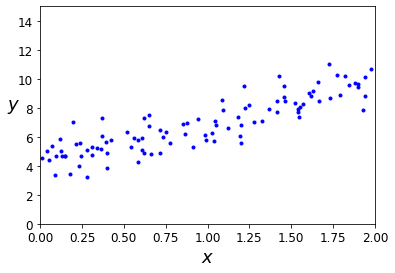

In [36]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Batch Gradient Descent

With batch gradient descent we calculate all the gradients for all the instances and move so that the error is minimised. We will use the [MSE](https://github.com/AlbinFranzen/Machine-Learning-Portfolio/blob/master/ML%20algorithms%20from%20scratch/Model%20Optimisation/Model%20Assessment/Regression%20Metrics.ipynb) as our metric. Lets calculate the gradient for the MSE with respect to each theta in our linear regression:

\begin{equation*}
\frac{\partial}{\partial \theta_j}\text{MSE}(\theta) = \frac{2}{m}\sum^{m}_{i=1}(\hat{y}_i-y_i)x_i
\end{equation*}

Or in matrix form:

\begin{equation*}
\nabla_\theta \text{MSE}(\theta) = \frac{2}{m}X^T(X\theta-y)
\end{equation*}

The gradient descent step is defined as follows:

\begin{equation*}
\theta_{n+1} = \theta_n - \eta \nabla_\theta \text{MSE}(\theta)
\end{equation*}

Now we implement it:

In [51]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

X_b = np.c_[ np.ones(( 100, 1)), X] # add bias vector of 1s

thetas = np.random.randn(2,1) #random initialisation
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y)
    thetas -= eta * gradients
thetas

array([[4.21509616],
       [2.77011339]])

We can see that our values for theta are correct and minimises the MSE! 

## Stochastic Gradient Descent

Instead of training gradient descent on all instances we can randomly select one to and move according to that gradient. Additionally we will minimise the learning rate each step according to the learning schedule function so that we converge more precisely the more that has been explored. For the gradient we also don't need to divide by m:

In [53]:
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50 #learning schedule parameter

def learning_schedule(t):
    return t0/(t+t1)

thetas = np.random.randn(2,1) #random initialisation

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_b[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        gradients = 2 * x_i.T.dot(x_i.dot(thetas) - y_i)
        eta = learning_schedule(epoch*m + i)
        thetas -= eta * gradients
thetas

array([[4.21076011],
       [2.74856079]])

As you can see we weren't far off despite only using 50 epochs.

## Mini-batch Gradient Descent

We can combine BGD and SGD using mini-batch gradient descent which selects small random subset of the instances each epoch and does batch gradient descent on those.